In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# building_permits_2019 = pd.read_csv(
#     "../Data/Building_Permits_in_2019.csv", low_memory=False
# )
# building_permits_2020 = pd.read_csv("../Data/Building_Permits_in_2020.csv")
# building_permits_2021 = pd.read_csv("../Data/Building_Permits_in_2021.csv")
building_permits_2022 = pd.read_csv("../Data/Building_Permits_in_2022.csv")
building_permits_2023 = pd.read_csv("../Data/Building_Permits_in_2023.csv")
building_permits = pd.concat(
    [
        # building_permits_2019,
        # building_permits_2020,
        # building_permits_2021,
        building_permits_2022,
        building_permits_2023,
    ],
    axis=0,
)


In [3]:
building_permits.shape


(58093, 44)

In [4]:
building_permits.columns

Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'DCSTATADDRESSKEY',
       'DCSTATLOCATIONKEY', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'HOTSPOT2006NAME', 'HOTSPOT2005NAME',
       'HOTSPOT2004NAME', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [5]:
building_permits.isnull().sum()


X                                  0
Y                                  0
OBJECTID                           0
DCRAINTERNALNUMBER                 0
ISSUE_DATE                         0
PERMIT_ID                          0
PERMIT_TYPE_NAME                   0
PERMIT_SUBTYPE_NAME              847
PERMIT_CATEGORY_NAME           54759
APPLICATION_STATUS_NAME            0
FULL_ADDRESS                       0
DESC_OF_WORK                   35132
SSL                             1832
ZONING                          4057
PERMIT_APPLICANT               32304
FEE_TYPE                        5277
FEES_PAID                          0
OWNER_NAME                      2742
LASTMODIFIEDDATE                   0
CITY                           58093
STATE                          58093
LATITUDE                           0
LONGITUDE                          0
XCOORD                             0
YCOORD                             0
ZIPCODE                        58093
MARADDRESSREPOSITORYID             0
D

In [6]:
building_permits["APPLICATION_STATUS_NAME"].unique()


array(['COMPLETED', 'PERMIT ISSUED', 'PERMIT CANCELED',
       'APPLICATION CANCELED', 'REVIEW IN PROCESS', 'READY FOR ISSUANCE',
       'PERMIT REVOKED', 'PAYMENT PENDING', 'APPLICATION APPROVED',
       'REVIEW IN PROGRESS', 'PROJECTDOX UNDER REVIEW',
       'APPLICATION SCREENING', 'PERMIT APPROVED', 'APPLICATION PENDING'],
      dtype=object)

In [7]:
building_permits = building_permits[
    building_permits["APPLICATION_STATUS_NAME"] == "COMPLETED"
]


In [8]:
building_permits.shape


(9572, 44)

In [9]:
# dropping entirely null columns
building_permits.dropna(axis=1, how="all", inplace=True)


In [10]:
building_permits.shape


(9572, 36)

In [11]:
building_permits.columns


Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE', 'XCOORD', 'YCOORD',
       'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [12]:
# Remove unnecessary columns
columns_to_drop = [
    "X",
    "Y",
    "XCOORD",
    "YCOORD",
    "OBJECTID",  # Not Useful in the analysis
    "GLOBALID",  # Not Useful in the analysis
    "CREATED_USER",  # Not Useful in the analysis
    "LAST_EDITED_USER",  # Not Useful in the analysis
    "DCRAINTERNALNUMBER",  # Not Useful in the analysis
    "APPLICATION_STATUS_NAME",  # As we are keeping obeservations APPLICATION_STATUS_NAME == 'Permit Issued'
    "BUSINESSIMPROVEMENTDISTRICT",  # mostly nulls
    "CREATED_DATE",  # it is the csv file generation date which is not useful
    "LAST_EDITED_DATE",  # it is the csv file generation date which is not useful
    "MARADDRESSREPOSITORYID", # removed as it's an internal address repository ID that does not provide useful information for predicting construction duration.
    "ANC", # removed because it represents Advisory Neighborhood Commissions, which are smaller than wards and provide similar location information. We decided to use wards for simplicity.
    "SMD", # removed because it represents Single Member Districts, which are smaller than wards and provide similar location information. We decided to use wards for simplicity.
    "PSA", # removed because it represents Police Service Areas, which are unrelated to construction duration
    "FULL_ADDRESS", # removed because it is the exact address where the construction is happpening
    'NEIGHBORHOODCLUSTER', # as they are smaller than wards and provide similar location information. We decided to use wards for simplicity.

]
building_permits.drop(columns=columns_to_drop, inplace=True)


In [13]:
building_permits.shape


(9572, 17)

In [14]:
building_permits.isnull().sum()


ISSUE_DATE                 0
PERMIT_ID                  0
PERMIT_TYPE_NAME           0
PERMIT_SUBTYPE_NAME        0
PERMIT_CATEGORY_NAME    9528
DESC_OF_WORK            6807
SSL                       66
ZONING                   378
PERMIT_APPLICANT        6696
FEE_TYPE                 817
FEES_PAID                  0
OWNER_NAME                67
LASTMODIFIEDDATE           0
LATITUDE                   0
LONGITUDE                  0
WARD                       0
DISTRICT                   0
dtype: int64

In [15]:
# PERMIT_CATEGORY_NAME      47959
# DESC_OF_WORK              33727
# SSL                         421
# ZONING                     3987
# PERMIT_APPLICANT          27823
# FEE_TYPE                   2609
# OWNER_NAME                  431
# This are columns with lots of null values and handling them is not possible so removing those
columns_to_drop = [
    "PERMIT_CATEGORY_NAME",
    "DESC_OF_WORK",
    "SSL",
    "ZONING",
    "PERMIT_APPLICANT",
    "FEE_TYPE",
    "OWNER_NAME",
]
building_permits.drop(columns=columns_to_drop, inplace=True)


In [16]:
building_permits.head()


,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,FEES_PAID,LASTMODIFIEDDATE,LATITUDE,LONGITUDE,WARD,DISTRICT
0,2022/02/23 05:00:00+00,E59783244,SUPPLEMENTAL,ELECTRICAL,44,2022/04/29 12:26:17+00,38.906576,-77.042011,2,SECOND
1,2022/02/23 05:00:00+00,E49961806,SUPPLEMENTAL,ELECTRICAL,369,2022/04/29 12:26:34+00,38.906576,-77.042011,2,SECOND
2,2022/02/23 05:00:00+00,E30487069,SUPPLEMENTAL,ELECTRICAL,154,2022/04/29 12:26:52+00,38.906576,-77.042011,2,SECOND
5,2022/04/27 04:00:00+00,PC39886778,POST CARD,BUILDING,36,2023/04/12 13:55:22+00,38.931727,-77.027864,1,THIRD
10,2022/07/16 04:00:00+00,E2209374,SUPPLEMENTAL,ELECTRICAL,109,2023/04/15 13:54:05+00,38.909491,-77.024186,2,THIRD


In [17]:
building_permits.shape

(9572, 10)

In [18]:
building_permits.columns

Index(['ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME',
       'FEES_PAID', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE', 'WARD',
       'DISTRICT'],
      dtype='object')

In [19]:
building_permits.isnull().sum()

ISSUE_DATE             0
PERMIT_ID              0
PERMIT_TYPE_NAME       0
PERMIT_SUBTYPE_NAME    0
FEES_PAID              0
LASTMODIFIEDDATE       0
LATITUDE               0
LONGITUDE              0
WARD                   0
DISTRICT               0
dtype: int64

In [20]:
building_permits[['ISSUE_DATE', 'LASTMODIFIEDDATE']]

,ISSUE_DATE,LASTMODIFIEDDATE
0,2022/02/23 05:00:00+00,2022/04/29 12:26:17+00
1,2022/02/23 05:00:00+00,2022/04/29 12:26:34+00
2,2022/02/23 05:00:00+00,2022/04/29 12:26:52+00
5,2022/04/27 04:00:00+00,2023/04/12 13:55:22+00
10,2022/07/16 04:00:00+00,2023/04/15 13:54:05+00
...,...,...
10120,2023/02/07 05:00:00+00,2023/03/26 13:57:37+00
10127,2023/02/09 05:00:00+00,2023/03/25 14:03:42+00
10134,2023/01/11 05:00:00+00,2023/03/24 13:59:29+00
10145,2023/02/03 05:00:00+00,2023/03/26 13:57:37+00


In [21]:
building_permits['ISSUE_DATE'] = pd.to_datetime(building_permits['ISSUE_DATE'])
building_permits['LASTMODIFIEDDATE'] = pd.to_datetime(building_permits['LASTMODIFIEDDATE'])

In [22]:
building_permits["LASTMODIFIEDDATE"].dt.year.unique()

array([2022, 2023], dtype=int64)

In [23]:
building_permits["ISSUE_DATE"].dt.year.unique()

array([2022, 2023], dtype=int64)

In [24]:
building_permits.columns

Index(['ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME',
       'FEES_PAID', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE', 'WARD',
       'DISTRICT'],
      dtype='object')

In [25]:
# Rename columns
building_permits = building_permits.rename(columns={
    'ISSUE_DATE': 'start_date',
    'PERMIT_ID': 'permit_id',
    'PERMIT_TYPE_NAME': 'permit_type',
    'PERMIT_SUBTYPE_NAME': 'permit_subtype',
    'FEES_PAID': 'fees_paid',
    'LASTMODIFIEDDATE': 'completion_date',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'WARD': 'ward',
    'DISTRICT': 'district',
})

| Column Name      | Description                                                                                  |
|------------------|----------------------------------------------------------------------------------------------|
| start_date       | The date when the construction permit was issued.                                            |
| permit_id        | A unique identifier for the construction permit.                                             |
| permit_type      | A general category for the type of construction work.                                        |
| permit_subtype   | A more specific category within the permit type.                                             |
| fees_paid        | The total amount of fees paid for the construction permit.                                   |
| completion_date  | The date when the construction work was completed (or last modified).                        |
| latitude         | The latitude of the construction site.                                                       |
| longitude        | The longitude of the construction site.                                                      |
| ward             | The administrative division of the construction site.                                        |
| district         | The district of the construction site.                                                       |


In [26]:
building_permits.columns

Index(['start_date', 'permit_id', 'permit_type', 'permit_subtype', 'fees_paid',
       'completion_date', 'latitude', 'longitude', 'ward', 'district'],
      dtype='object')

In [27]:
building_permits['duration'] = (building_permits['completion_date'] - building_permits['start_date']).dt.days

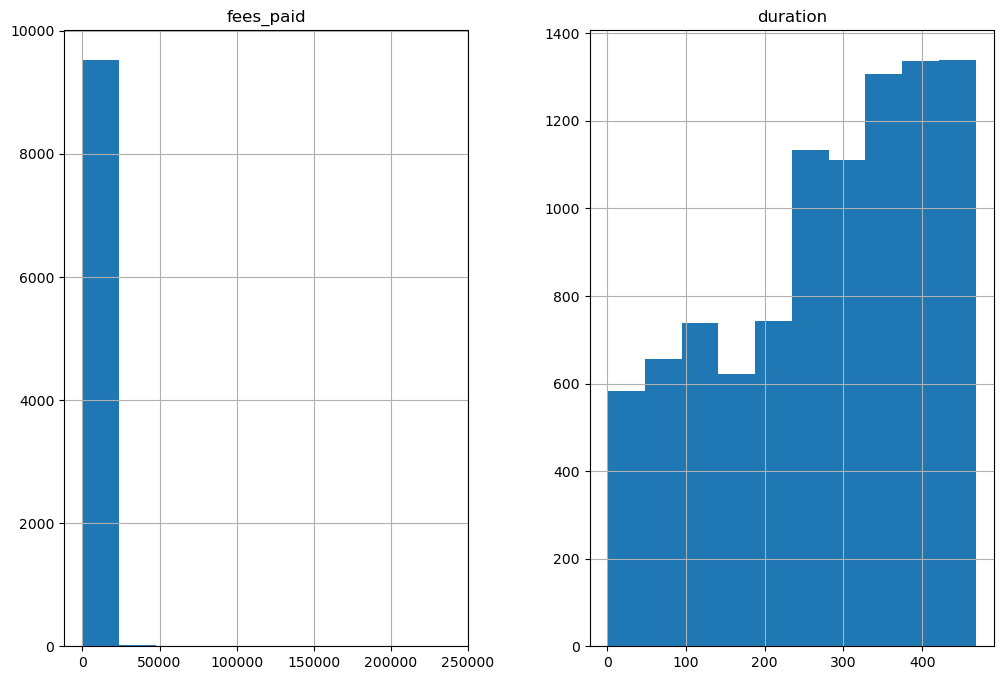

In [28]:
numeric_vars = ['fees_paid', 'duration']
building_permits[numeric_vars].hist(figsize=(12, 8))
plt.show()

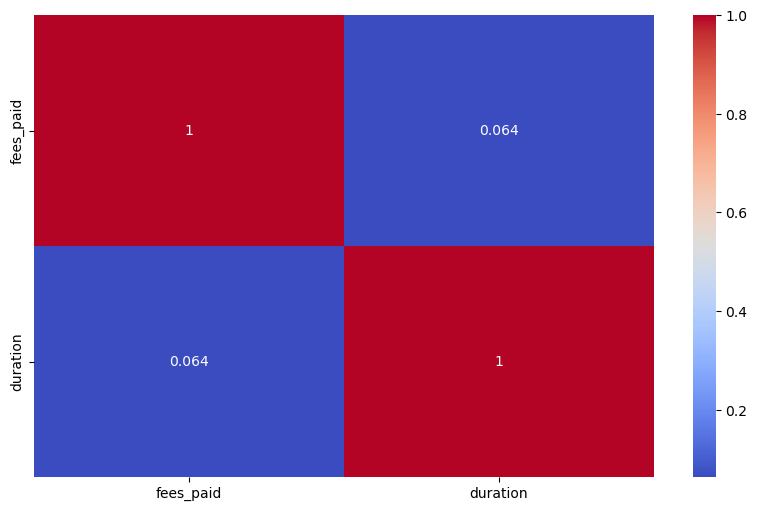

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(building_permits[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

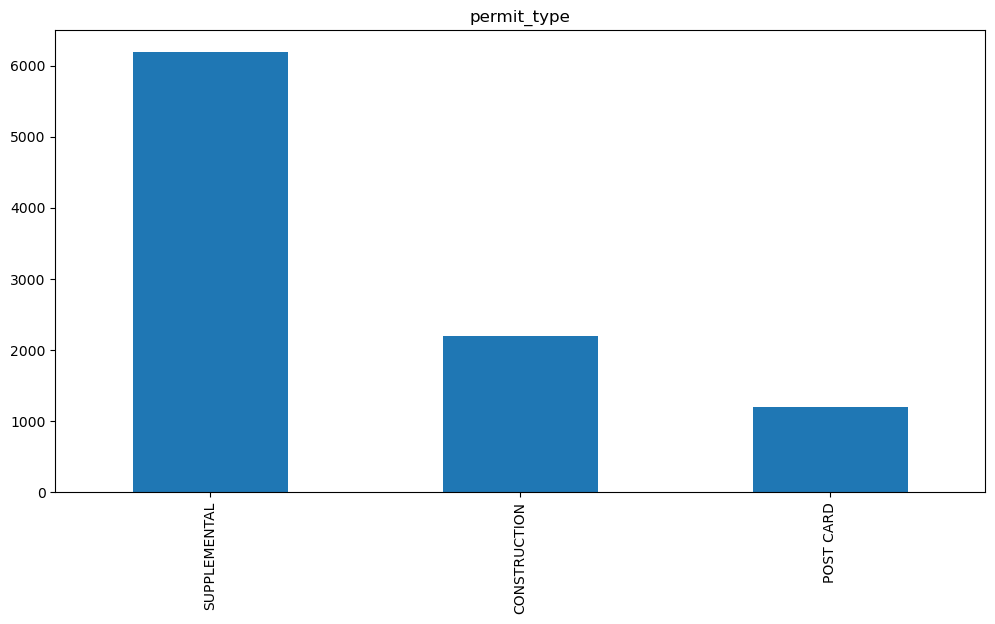

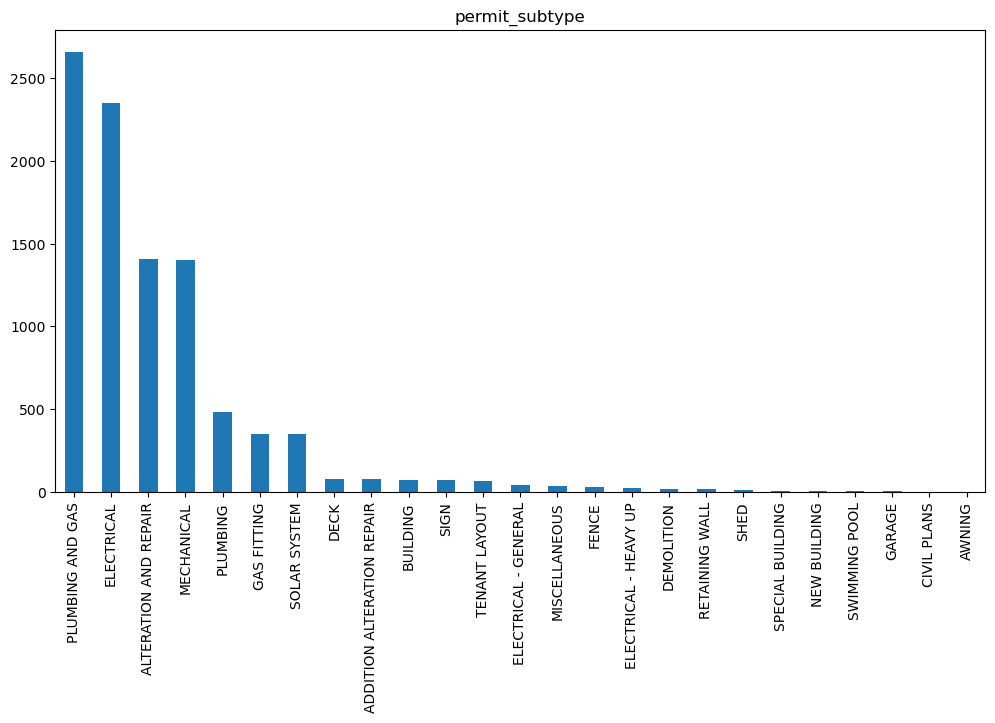

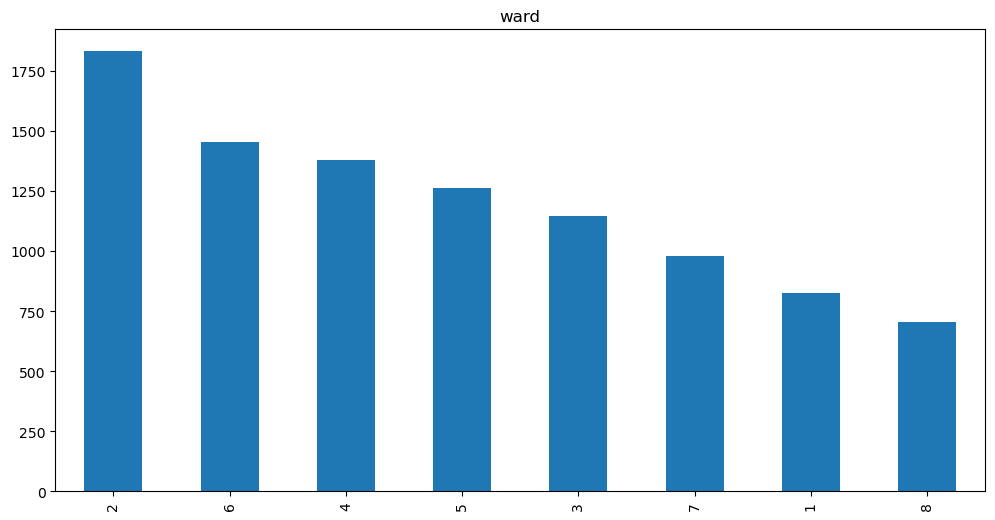

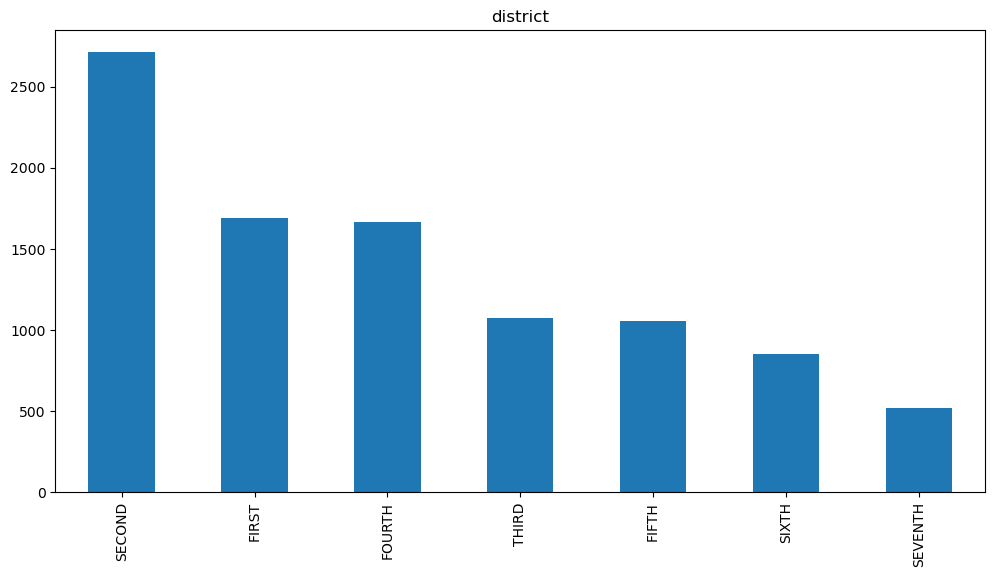

In [30]:
categorical_vars = ['permit_type', 'permit_subtype', 'ward', 'district',]

for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    building_permits[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()


In [31]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Remove outliers in the 'duration' column
# building_permits = remove_outliers_iqr(building_permits, 'duration')

In [32]:
without_outliers_df = remove_outliers_iqr(building_permits, 'duration')

In [33]:
without_outliers_df.shape

(9572, 11)

In [34]:
building_permits.shape

(9572, 11)

In [35]:
building_permits["fees_paid"]

0         44
1        369
2        154
5         36
10       109
        ... 
10120     29
10127     29
10134     22
10145     29
10148     29
Name: fees_paid, Length: 9572, dtype: int64

In [36]:
without_outliers_df = remove_outliers_iqr(building_permits, 'fees_paid')

In [37]:
without_outliers_df.shape

(8499, 11)

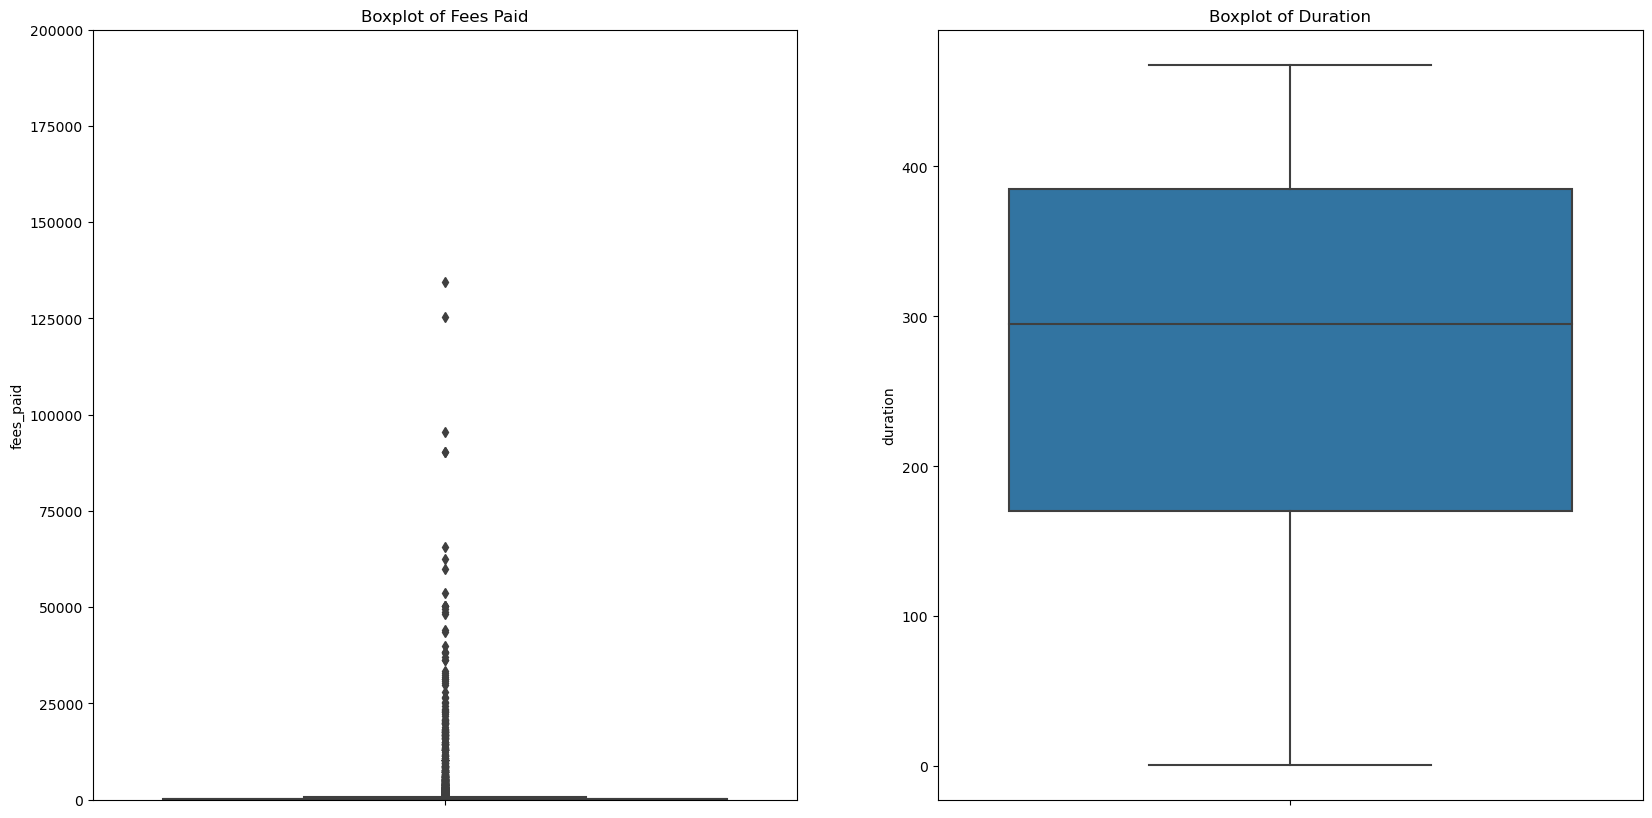

In [38]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=building_permits, y='fees_paid')
plt.ylim(0,200000)
plt.title('Boxplot of Fees Paid')

plt.subplot(1, 2, 2)
sns.boxplot(data=building_permits, y='duration')
plt.title('Boxplot of Duration')

plt.show()

In [62]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 10148
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   start_date                            8499 non-null   datetime64[ns, UTC]
 1   permit_id                             8499 non-null   object             
 2   fees_paid                             8499 non-null   int64              
 3   completion_date                       8499 non-null   datetime64[ns, UTC]
 4   latitude                              8499 non-null   float64            
 5   longitude                             8499 non-null   float64            
 6   duration                              8499 non-null   int64              
 7   permit_type_POST CARD                 8499 non-null   uint8              
 8   permit_type_SUPPLEMENTAL              8499 non-null   uint8              
 9   permit_subtype_ALT

In [39]:
building_permits["fees_paid"].max() 

238293

In [40]:
# building_permits[building_permits["fees_paid"]>=200000].shape

In [41]:
building_permits = remove_outliers_iqr(building_permits, 'fees_paid')

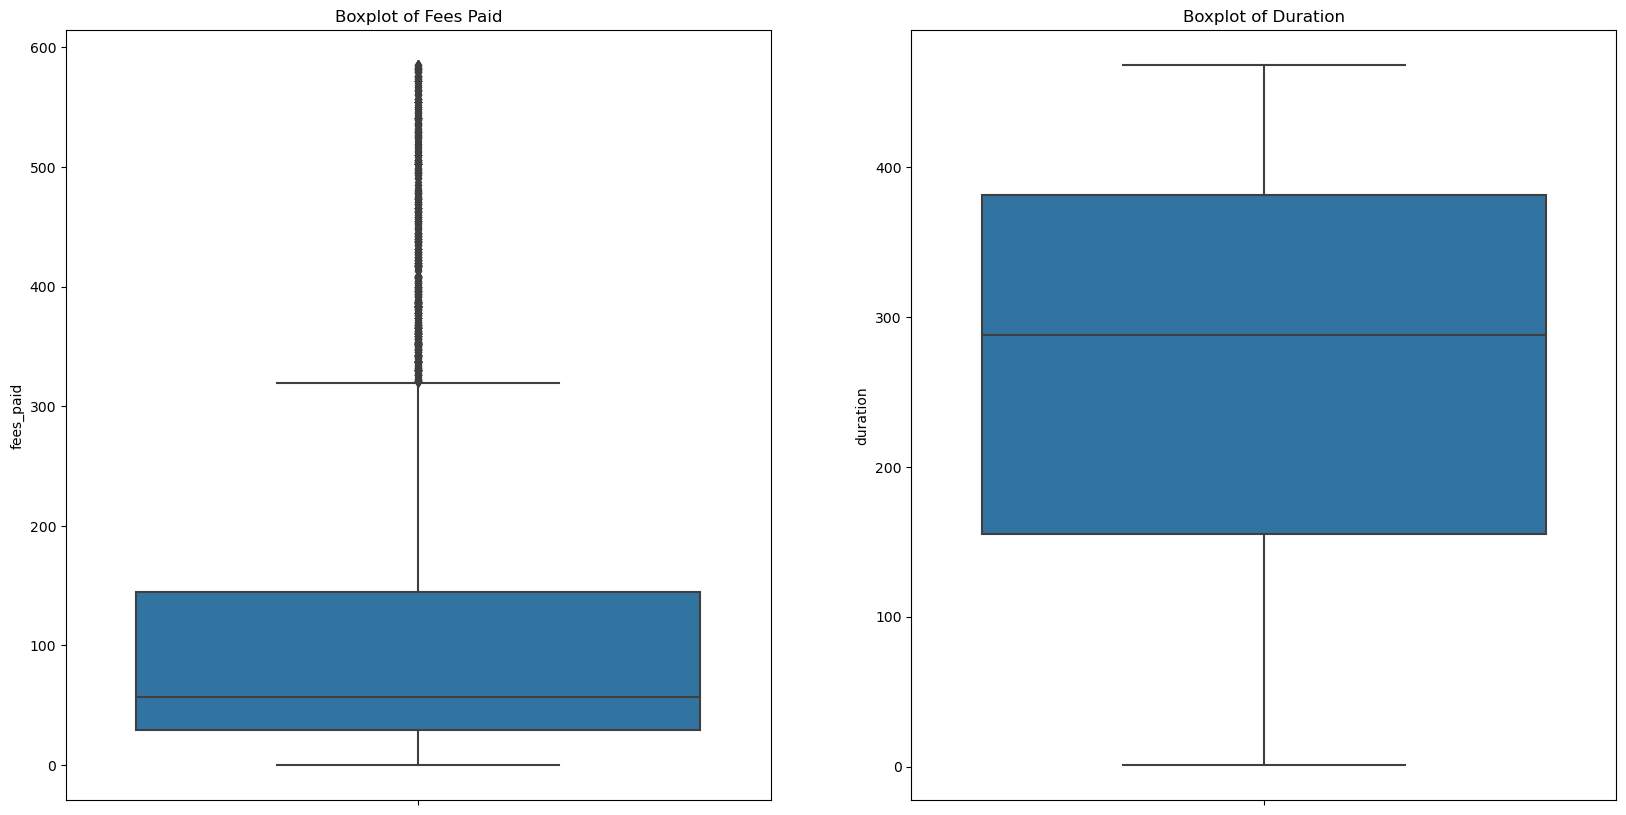

In [42]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=building_permits, y='fees_paid')
# plt.ylim(0,200000)
plt.title('Boxplot of Fees Paid')

plt.subplot(1, 2, 2)
sns.boxplot(data=building_permits, y='duration')
plt.title('Boxplot of Duration')

plt.show()

In [43]:
building_permits.shape

(8499, 11)

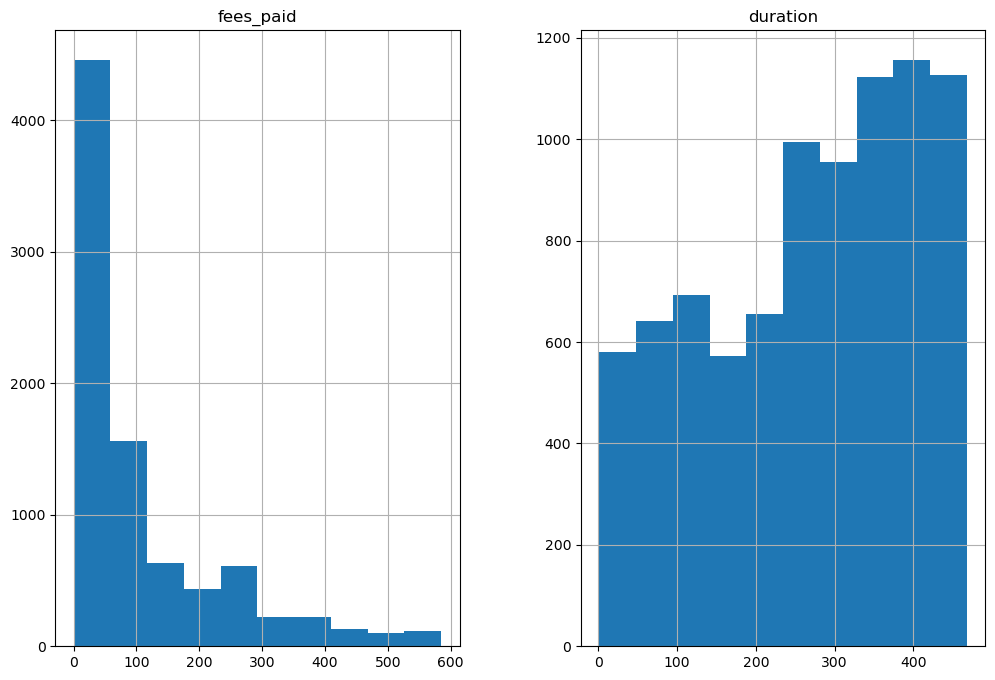

In [44]:
numeric_vars = ['fees_paid', 'duration']
building_permits[numeric_vars].hist(figsize=(12, 8))
plt.show()

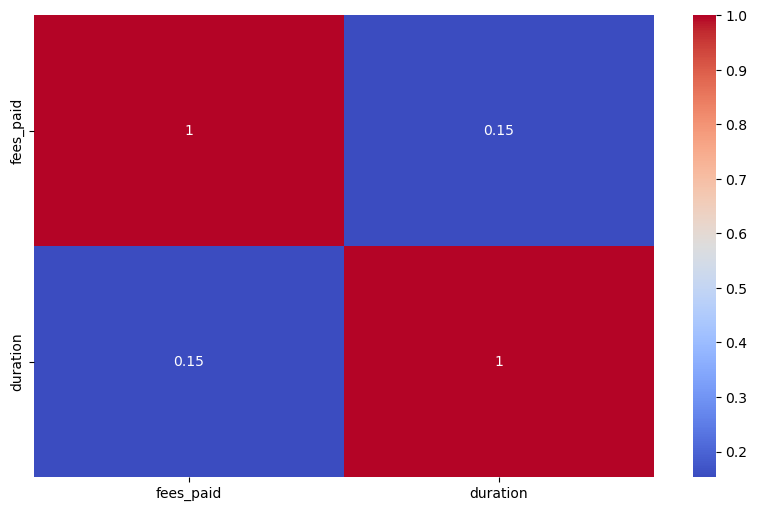

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(building_permits[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

In [46]:
building_permits_encoded = pd.get_dummies(building_permits, columns=categorical_vars, drop_first=True)


In [47]:
building_permits_encoded.head()

,start_date,permit_id,fees_paid,completion_date,latitude,longitude,duration,permit_type_POST CARD,permit_type_SUPPLEMENTAL,permit_subtype_ALTERATION AND REPAIR,...,ward_5,ward_6,ward_7,ward_8,district_FIRST,district_FOURTH,district_SECOND,district_SEVENTH,district_SIXTH,district_THIRD
0,2022-02-23 05:00:00+00:00,E59783244,44,2022-04-29 12:26:17+00:00,38.906576,-77.042011,65,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2022-02-23 05:00:00+00:00,E49961806,369,2022-04-29 12:26:34+00:00,38.906576,-77.042011,65,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2022-02-23 05:00:00+00:00,E30487069,154,2022-04-29 12:26:52+00:00,38.906576,-77.042011,65,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,2022-04-27 04:00:00+00:00,PC39886778,36,2023-04-12 13:55:22+00:00,38.931727,-77.027864,350,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10,2022-07-16 04:00:00+00:00,E2209374,109,2023-04-15 13:54:05+00:00,38.909491,-77.024186,273,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
building_permits_encoded.shape

(8499, 46)

In [49]:
correlation_matrix = building_permits_encoded.drop(columns=['latitude', 'longitude']).corr()

C:\Users\meetd\AppData\Local\Temp\ipykernel_14740\1666257570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = building_permits_encoded.drop(columns=['latitude', 'longitude']).corr()


In [50]:
correlation_matrix.head()

,fees_paid,duration,permit_type_POST CARD,permit_type_SUPPLEMENTAL,permit_subtype_ALTERATION AND REPAIR,permit_subtype_AWNING,permit_subtype_BUILDING,permit_subtype_CIVIL PLANS,permit_subtype_DECK,permit_subtype_DEMOLITION,...,ward_5,ward_6,ward_7,ward_8,district_FIRST,district_FOURTH,district_SECOND,district_SEVENTH,district_SIXTH,district_THIRD
fees_paid,1.000000,0.153066,-0.266816,-0.115827,0.243010,-0.004721,-0.059452,-0.006977,0.102172,0.010242,...,-0.026140,-0.001242,0.027595,0.045984,0.016896,-0.039806,0.003912,0.036414,0.026508,-0.019445
duration,0.153066,1.000000,0.055762,-0.068507,0.056001,0.004792,0.012501,0.005842,-0.094653,-0.008305,...,0.036526,-0.029248,-0.001701,0.032936,-0.017400,0.012500,-0.024524,0.026702,-0.004801,-0.009365
permit_type_POST CARD,-0.266816,0.055762,1.000000,-0.601330,-0.134530,-0.007593,0.228744,-0.004384,-0.037089,-0.014547,...,0.026118,-0.062125,-0.016887,-0.001885,-0.069024,0.123901,-0.018925,-0.013103,-0.004092,-0.051538
permit_type_SUPPLEMENTAL,-0.115827,-0.068507,-0.601330,1.000000,-0.495418,-0.027963,-0.137551,-0.016143,-0.136584,-0.053571,...,-0.056122,0.058013,-0.018873,-0.024562,0.072545,-0.119424,0.086353,-0.020143,-0.031996,0.033878
permit_subtype_ALTERATION AND REPAIR,0.243010,0.056001,-0.134530,-0.495418,1.000000,-0.006256,-0.030773,-0.003611,-0.030557,-0.011985,...,0.049734,0.002404,0.003468,0.002771,-0.002896,0.015497,-0.064589,-0.001367,0.012476,0.025749


In [51]:
correlations_with_duration = correlation_matrix['duration'].sort_values(ascending=False)


In [52]:
print(correlations_with_duration)


duration                                1.000000
fees_paid                               0.153066
permit_subtype_ELECTRICAL               0.057405
permit_subtype_PLUMBING                 0.056061
permit_subtype_ALTERATION AND REPAIR    0.056001
permit_type_POST CARD                   0.055762
ward_5                                  0.036526
ward_8                                  0.032936
permit_subtype_SOLAR SYSTEM             0.032929
ward_2                                  0.032189
district_SEVENTH                        0.026702
permit_subtype_ELECTRICAL - GENERAL     0.019535
permit_subtype_BUILDING                 0.012501
district_FOURTH                         0.012500
permit_subtype_GAS FITTING              0.010489
permit_subtype_NEW BUILDING             0.010406
permit_subtype_SPECIAL BUILDING         0.008640
permit_subtype_SWIMMING POOL            0.007206
permit_subtype_CIVIL PLANS              0.005842
permit_subtype_SIGN                     0.004818
permit_subtype_AWNIN

In [53]:
building_permits_encoded.shape

(8499, 46)

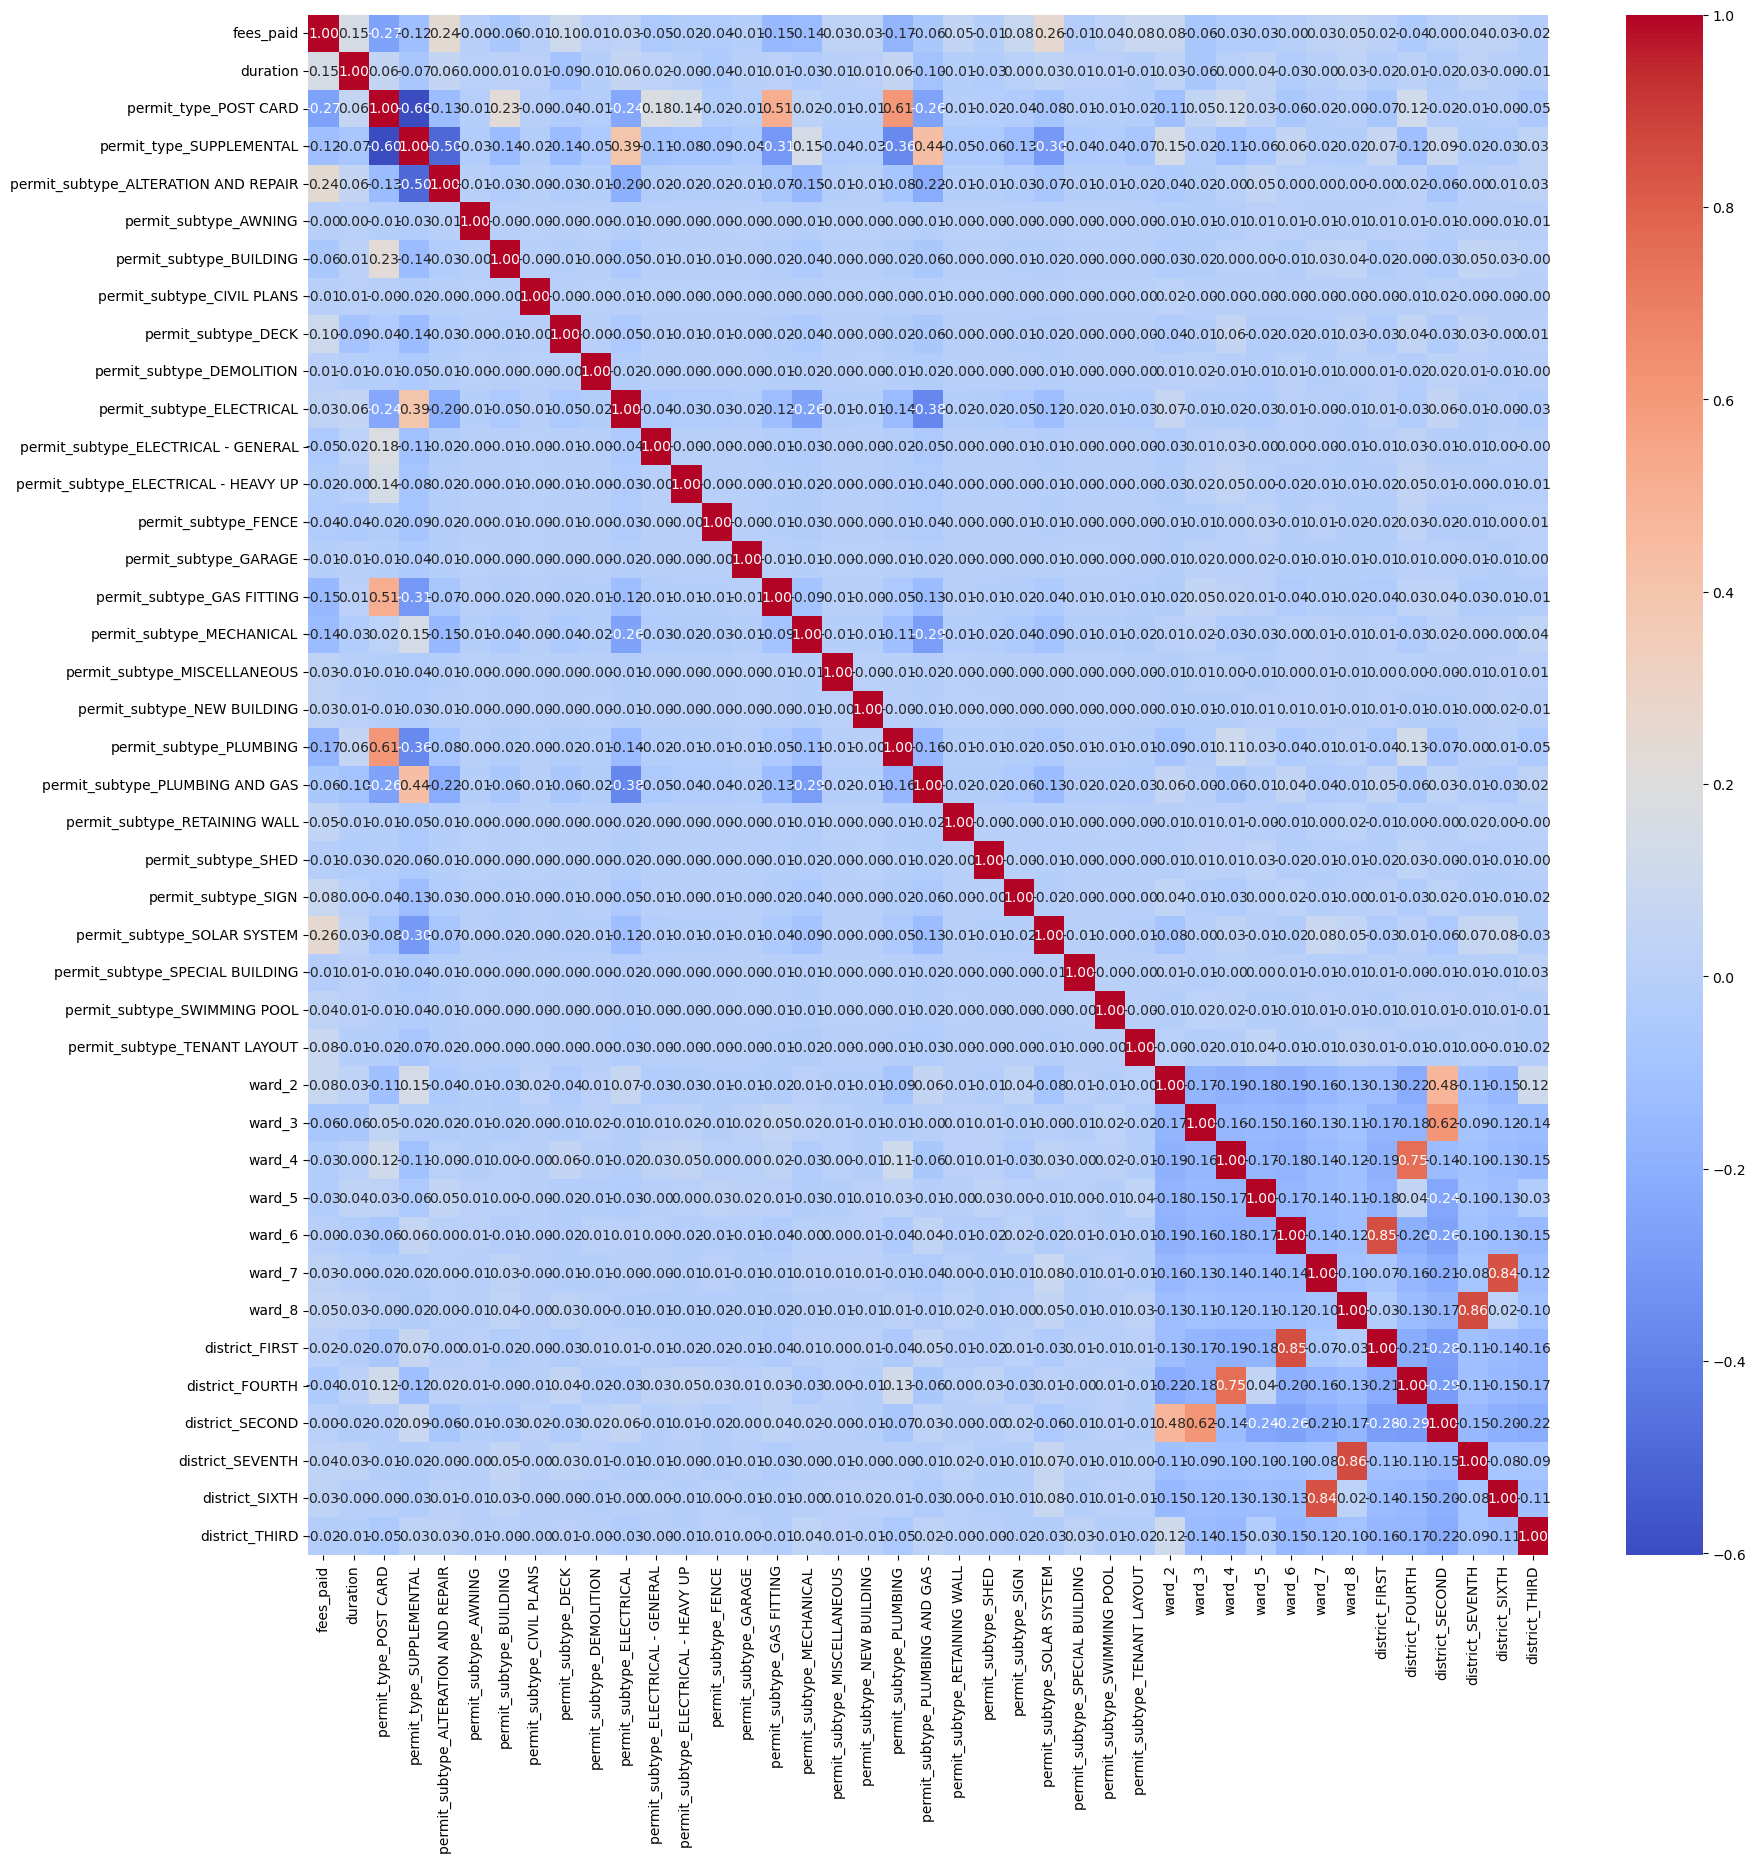

In [54]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

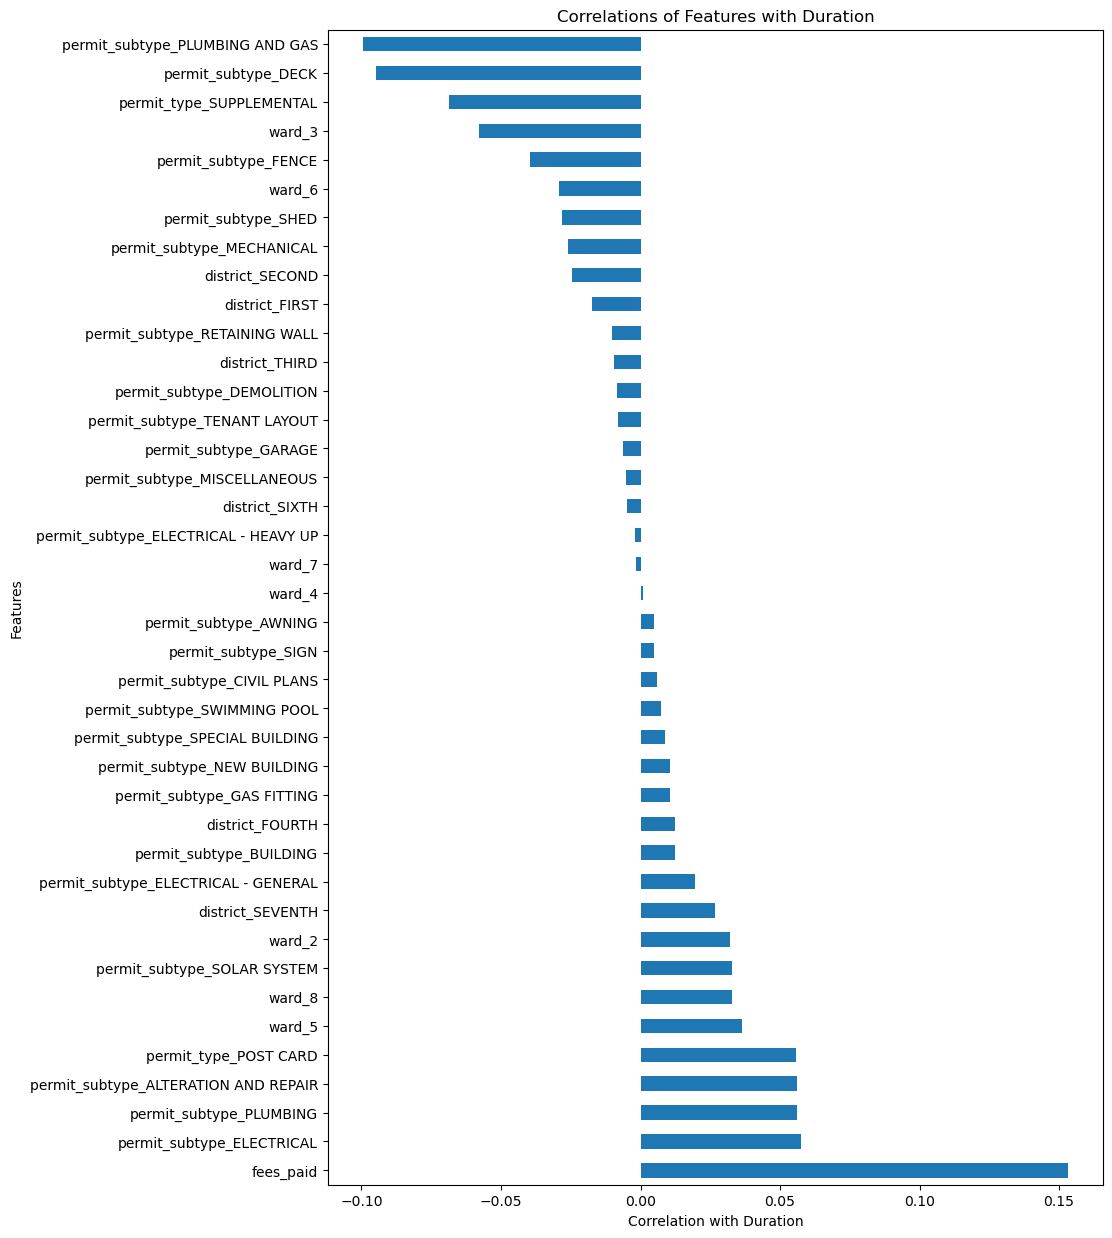

In [55]:
plt.figure(figsize=(10, 15))
correlations_with_duration.drop('duration').plot(kind='barh')
plt.xlabel('Correlation with Duration')
plt.ylabel('Features')
plt.title('Correlations of Features with Duration')
plt.show()

In [56]:
print(correlations_with_duration)

duration                                1.000000
fees_paid                               0.153066
permit_subtype_ELECTRICAL               0.057405
permit_subtype_PLUMBING                 0.056061
permit_subtype_ALTERATION AND REPAIR    0.056001
permit_type_POST CARD                   0.055762
ward_5                                  0.036526
ward_8                                  0.032936
permit_subtype_SOLAR SYSTEM             0.032929
ward_2                                  0.032189
district_SEVENTH                        0.026702
permit_subtype_ELECTRICAL - GENERAL     0.019535
permit_subtype_BUILDING                 0.012501
district_FOURTH                         0.012500
permit_subtype_GAS FITTING              0.010489
permit_subtype_NEW BUILDING             0.010406
permit_subtype_SPECIAL BUILDING         0.008640
permit_subtype_SWIMMING POOL            0.007206
permit_subtype_CIVIL PLANS              0.005842
permit_subtype_SIGN                     0.004818
permit_subtype_AWNIN

In [57]:
print("Feature\t\t\tCorrelation with Duration")
print("-" * 40)
for index, value in correlations_with_duration.items():
    print(f"{index: <25} {value:.2f}")


Feature			Correlation with Duration
----------------------------------------
duration                  1.00
fees_paid                 0.15
permit_subtype_ELECTRICAL 0.06
permit_subtype_PLUMBING   0.06
permit_subtype_ALTERATION AND REPAIR 0.06
permit_type_POST CARD     0.06
ward_5                    0.04
ward_8                    0.03
permit_subtype_SOLAR SYSTEM 0.03
ward_2                    0.03
district_SEVENTH          0.03
permit_subtype_ELECTRICAL - GENERAL 0.02
permit_subtype_BUILDING   0.01
district_FOURTH           0.01
permit_subtype_GAS FITTING 0.01
permit_subtype_NEW BUILDING 0.01
permit_subtype_SPECIAL BUILDING 0.01
permit_subtype_SWIMMING POOL 0.01
permit_subtype_CIVIL PLANS 0.01
permit_subtype_SIGN       0.00
permit_subtype_AWNING     0.00
ward_4                    0.00
ward_7                    -0.00
permit_subtype_ELECTRICAL - HEAVY UP -0.00
district_SIXTH            -0.00
permit_subtype_MISCELLANEOUS -0.01
permit_subtype_GARAGE     -0.01
permit_subtype_TENANT LAYOUT -0

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
building_permits = building_permits_encoded

In [60]:
a = [

]


In [61]:
# Split the data into training and testing sets
X = building_permits.drop(columns=['duration', 'start_date', 'permit_id', 'completion_date',
    "start_date",
    "permit_id",
    "fees_paid",
    "completion_date",
    "latitude",
    "longitude",
    "duration",
    "permit_type_POST CARD",
    "permit_type_SHOP DRAWING",
    "permit_type_SUPPLEMENTAL",
    "district_FIRST",
    "district_FOURTH",
    "district_SECOND",
    "district_SEVENTH",
    "district_SIXTH",
    "district_THIRD",
                                   ])
y = building_permits['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['permit_type_SHOP DRAWING'] not found in axis"

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Performance Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression: MSE =", mse_lr, ", R2 =", r2_lr)


Linear Regression: MSE = 181040.01737485453 , R2 = 0.01671827074537524


In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performance Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest: MSE =", mse_rf, ", R2 =", r2_rf)


Random Forest: MSE = 180901.43101808056 , R2 = 0.017470974122870353


In [ ]:
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Performance Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost: MSE =", mse_xgb, ", R2 =", r2_xgb)

XGBoost: MSE = 180642.14671648198 , R2 = 0.01887922363665895


In [ ]:
# Create a DataFrame with actual values and predictions from each model
results_df = pd.DataFrame({'Actual': y_test,
                           'Linear Regression': y_pred_lr,
                           'Random Forest': y_pred_rf,
                           'XGBoost': y_pred_xgb})

# Reset the index of the DataFrame
results_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(results_df)


      Actual  Linear Regression  Random Forest     XGBoost
0       1369         814.339704     824.955599  824.986328
1       1487         865.354459     881.500920  879.101685
2        623         727.061237     696.609684  712.945679
3       1324         866.259017     841.728695  841.034790
4        856         844.665305     823.770787  835.522522
...      ...                ...            ...         ...
8397     373         903.670385     903.382521  906.435425
8398    1017         869.153196     870.804397  871.609741
8399    1063         817.441955     822.520783  822.504944
8400    1192         866.259017     841.728695  841.034790
8401    1166         903.670385     903.382521  906.435425

[8402 rows x 4 columns]
